# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [7]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [59]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### Respuestas

1. El conjunto de datos "Boston House Price" fue colectado por el servicio de sensos de los Estados Unidos de América y aparecieron en el ámbito de la estadística en el año 1978 en una publicacion titulada "Hedonic housing prices and the demand of clean air" por David Harrison Jr. y Daniel L. Rubinfeld. La hipótesis de los investigadores y el uso que se le dio a los datos fue para determinar si el si las personas estaban dispuestas a pagar más por una propiedad en base a las características ambientales que la rodea (ver [1] y [2].

2. La variable objetivo es MEDV y representa el "Valor medio de las viviendas ocupadas por sus propietarios" [1].

3. Aparte de MEDV que, como se mencionó, es habitualmente empleado como el valor objetivo se encuentran disponibles los siguientes features:

    * CRIM tasa de crimenes per capita por ciudad.
    * ZN proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
    * INDUS proporción de acres de negocios no minoristas por ciudad.
    * CHAS Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
    * NOX concentración de óxidos nítricos (partes por 10 millones).
    * RM número promedio de habitaciones por vivienda.
    * AGE proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
    * DIS distancias ponderadas a cinco centros de empleo de Boston.
    * RAD índice de accesibilidad a carreteras radiales.
    * TAX tasa de impuesto a la propiedad de valor total por \$ 10\,000.
    * PTRATIO relación alumno-profesor por localidad.
    * B 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad.
    * LSTAT \% estatus más bajo de la población.
    * MEDV Valor medio de las viviendas ocupadas por sus propietarios en escala de miles.

4. En forma intuitiva podríamos pensar que las características (CRIM, INDUS, NOX, RM DIS, RAD, TAX, LSTAT)

5. A primera vista creo que la característica B es una métrica racista. Luego, me da la impresión que el análisis se orienta (sesga) hacia una clase media o media alta cuando incorpora la característica LSTAT, CRIM y INDUS. En lo que la éstadistica concierne, creo que la cantidad de datos disponibles puede ser poca como para generalizar en el contexto actual, no estoy seguro que se puedan efectuar prediciones de gran precisión. Finalmente, a partir de [2] se mencionan los siguientes problemas de origen en el conjunto de datos: 

    * *Datos censurados:* En este caso, decidieron establecer el valor máximo de la variable MEDV en 50k USD, por lo que ningún precio puede ir más allá de ese valor.
    * *Datos incorrectos:* Se descubrió que ocho de los precios medios en la columna de valor medio eran erróneos. Aparentemente corregidos pasado el tiempo.

#### Referencias

[1] [Documentacion Scikit Learn Dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[2] [What You Didn’t Know About the Boston Housing Dataset](https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8)

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

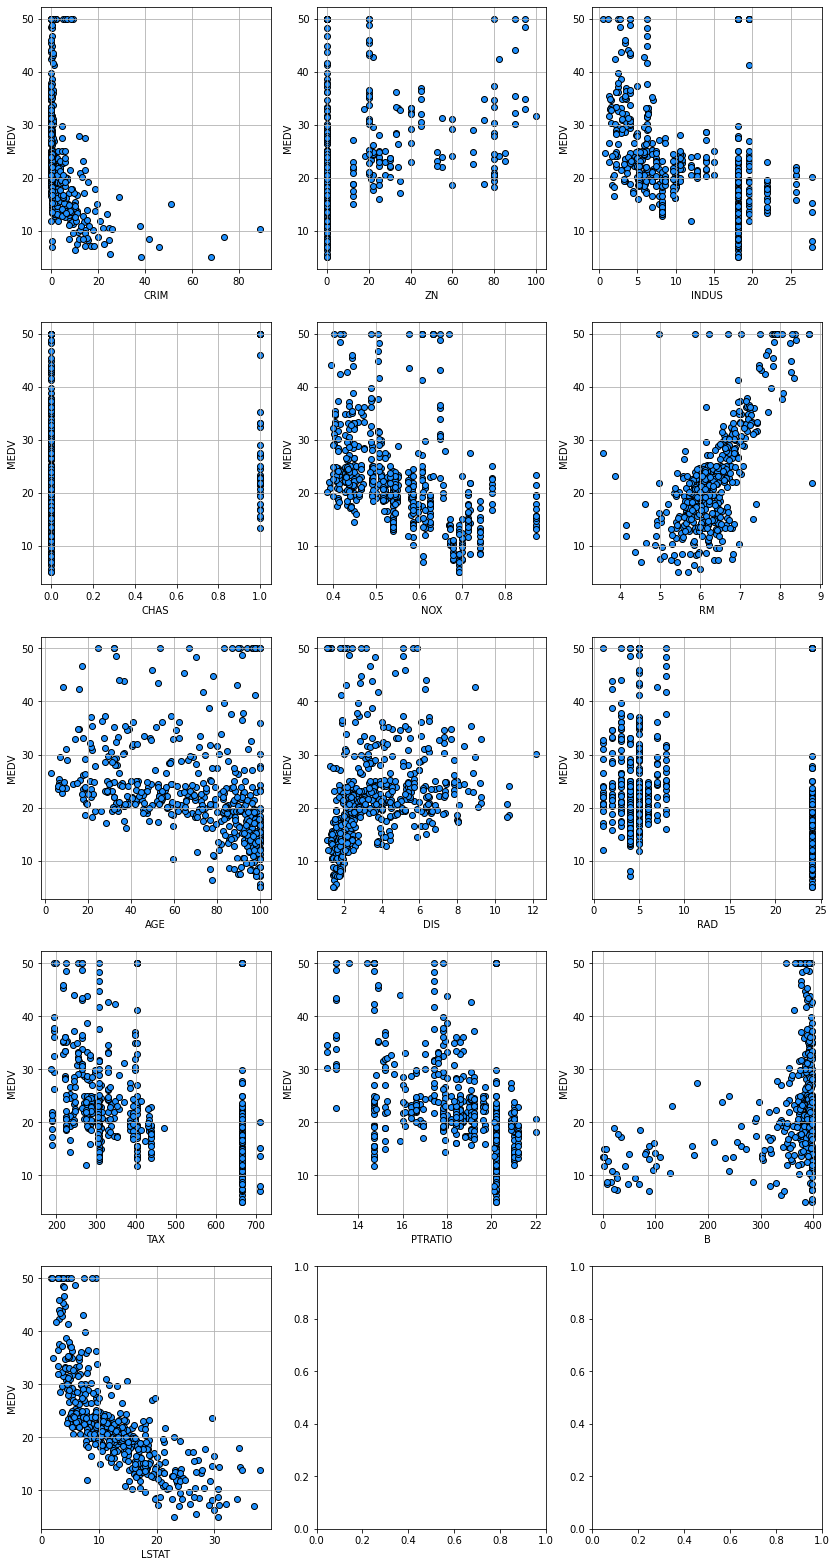

In [9]:
# 1. Resolver acá. Ayuda/ejemplo:
ncols = 3
nrows = np.ceil(boston['feature_names'].shape[0]/ncols).astype(int) # Numero de filas para plotear
fsize = 14 # Tamaño de la subfigura

# Matriz de subfiguras con reshape para poder indexarla
fig, axs = plt.subplots(nrows, ncols, figsize=(fsize,2*fsize))
axs = axs.reshape(1,ncols*nrows)[0]

for idx, feature in enumerate(boston['feature_names']):
    selector = (boston['feature_names'] == feature)
    axs[idx].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[idx].set_xlabel(feature)
    axs[idx].set_ylabel('MEDV')
#     axs[idx].set_title(feature)
    axs[idx].grid(True)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [10]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [11]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [12]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_error:0.2}')
print(f'Test MSE: {test_error:0.2}')
print(f'Train error: {np.sqrt(train_error):0.2}')
print(f'Test error: {np.sqrt(test_error):0.2}')

Train MSE: 4.3e+01
Test MSE: 4.7e+01
Train error: 6.5
Test error: 6.8


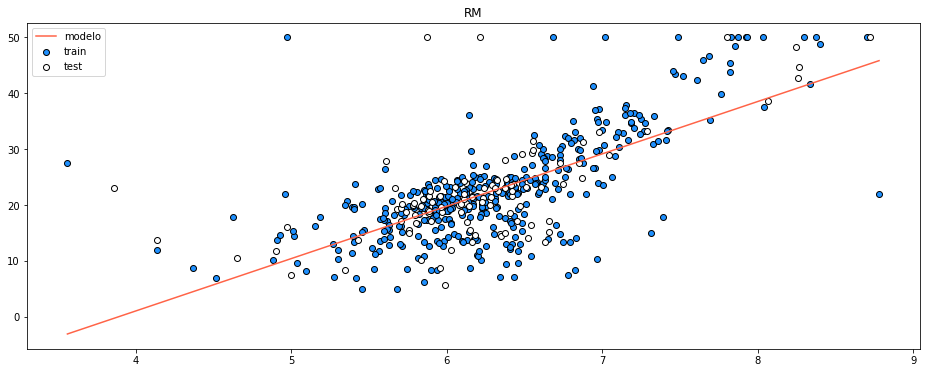

In [13]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,6))
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [14]:
# 1. Resolver acá.

train_mse = list()
test_mse = list()
degrees = range(1,10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)

    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_mse.append(train_error)
    test_mse.append(test_error)
    
    print(f'Degree: {degree} Train MSE: {train_error:0.2} Test MSE: {test_error:0.2}')

Degree: 1 Train MSE: 4.3e+01 Test MSE: 4.7e+01
Degree: 2 Train MSE: 3.8e+01 Test MSE: 4e+01
Degree: 3 Train MSE: 3.6e+01 Test MSE: 4e+01
Degree: 4 Train MSE: 3.5e+01 Test MSE: 4.2e+01
Degree: 5 Train MSE: 3.3e+01 Test MSE: 4.1e+01
Degree: 6 Train MSE: 3.3e+01 Test MSE: 4.1e+01
Degree: 7 Train MSE: 3.3e+01 Test MSE: 4.2e+01
Degree: 8 Train MSE: 3.3e+01 Test MSE: 4.2e+01
Degree: 9 Train MSE: 3.3e+01 Test MSE: 4.6e+01


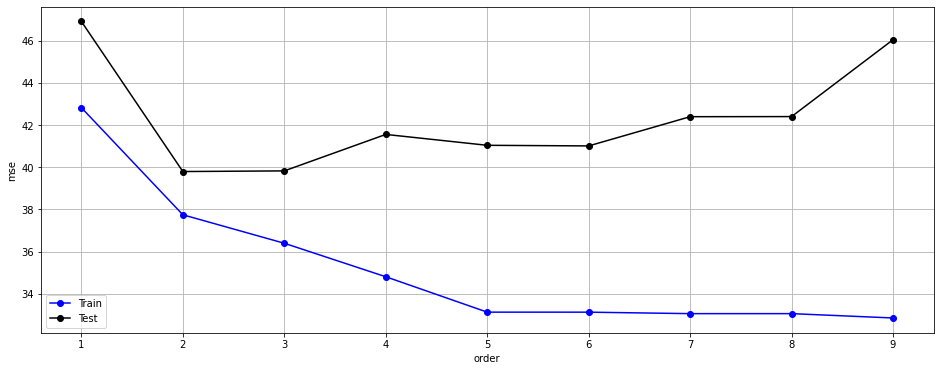

In [15]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(16,6))
plt.plot(degrees, train_mse, 'b-o', label='Train')
plt.plot(degrees, test_mse, 'k-o', label='Test')
plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
plt.grid(True)

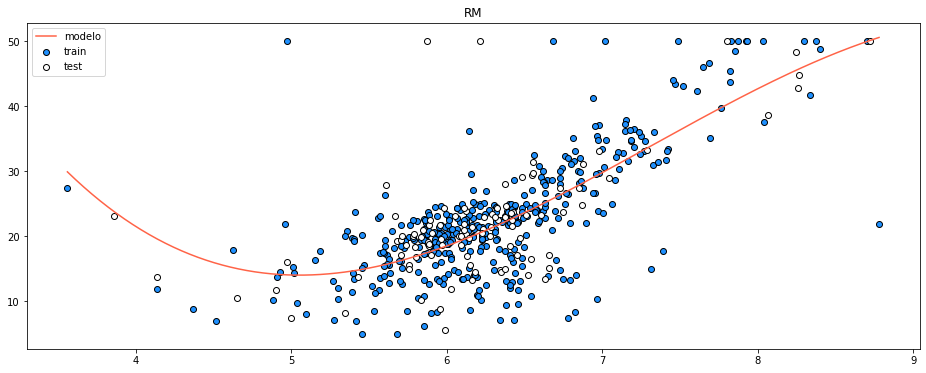

In [16]:
# 4. Reconstruir mejor modelo acá y graficar.

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)


x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,6))
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [17]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

Degree: 1 Train MSE: 2.9e+01 Test MSE: 3.7e+01
Degree: 2 Train MSE: 1.9e+01 Test MSE: 2.8e+01
Degree: 3 Train MSE: 1.7e+01 Test MSE: 2.9e+01
Degree: 4 Train MSE: 1.4e+01 Test MSE: 3.4e+01
Degree: 5 Train MSE: 1.3e+01 Test MSE: 3.4e+01
Degree: 6 Train MSE: 1.2e+01 Test MSE: 3.5e+01
Degree: 7 Train MSE: 1.2e+01 Test MSE: 1.6e+02
Degree: 8 Train MSE: 1.2e+01 Test MSE: 7.4e+02
Degree: 9 Train MSE: 1.4e+01 Test MSE: 7e+02


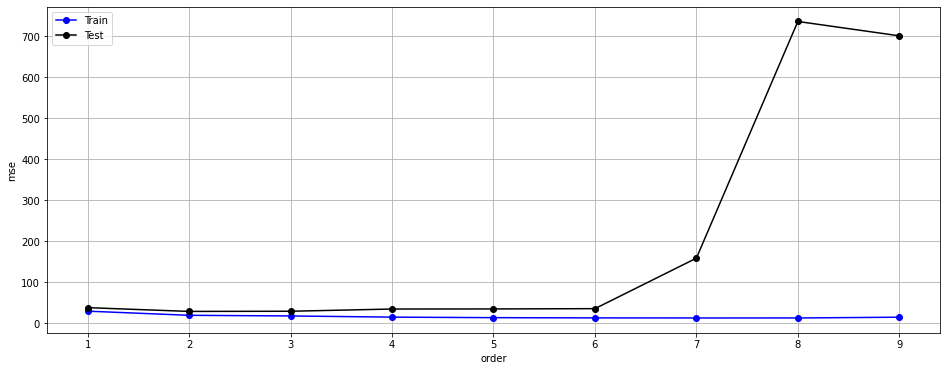

In [18]:
# 2. Resolver acá.
train_mse = list()
test_mse = list()
degrees = range(1,10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)

    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_mse.append(train_error)
    test_mse.append(test_error)
    
    print(f'Degree: {degree} Train MSE: {train_error:0.2} Test MSE: {test_error:0.2}')
    
plt.figure(figsize=(16,6))
plt.plot(degrees, train_mse, 'b-o', label='Train')
plt.plot(degrees, test_mse, 'k-o', label='Test')
plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
plt.grid(True)

## Más ejercicios (opcionales)
### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

Degree: 1 Train MSE: 1.9e+01 Test MSE: 3.3e+01
Degree: 2 Train MSE: 6.3 Test MSE: 2.5e+01
Degree: 3 Train MSE: 2.3e-11 Test MSE: 1.1e+06
Degree: 4 Train MSE: 2.2e-19 Test MSE: 9.8e+05
Degree: 5 Train MSE: 7.2e-20 Test MSE: 2e+05
Degree: 6 Train MSE: 1.1e-20 Test MSE: 2e+05
Degree: 7 Train MSE: 1e-18 Test MSE: 2.5e+04
Degree: 8 Train MSE: 5.7e-20 Test MSE: 1.7e+05
Degree: 9 Train MSE: 2e-19 Test MSE: 5.6e+05


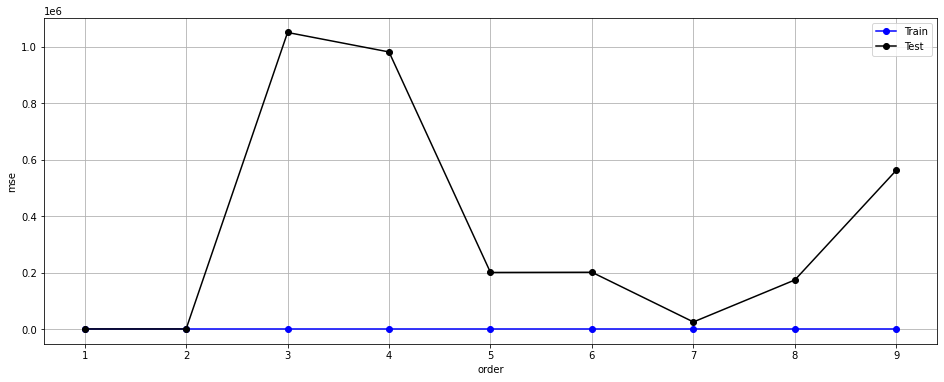

In [19]:
train_mse = list()
test_mse = list()
degrees = range(1,10)
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_mse.append(train_error)
    test_mse.append(test_error)
    
    print(f'Degree: {degree} Train MSE: {train_error:0.2} Test MSE: {test_error:0.2}')
    
plt.figure(figsize=(16,6))
plt.plot(degrees, train_mse, 'b-o', label='Train')
plt.plot(degrees, test_mse, 'k-o', label='Test')
plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
plt.grid(True)

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

(24, 1) (6, 1) (24, 1) (6, 1)


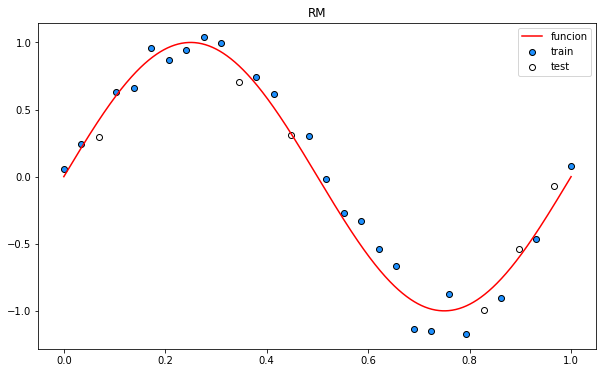

In [70]:
# 1. Resolver acá. Ayuda (con dos atributos):

Xp = np.linspace(0,1,1000)
Yp = np.sin(2*np.pi*Xp)

N = 30
X = np.linspace(0,1,N)
X = np.array([[i] for i in X])
Y = np.sin(2*np.pi*X)

y = Y + np.array([[i] for i in np.random.normal(0, 0.1, N)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.figure(figsize=(10,6))
plt.plot(Xp,Yp, 'r', label='funcion')
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/pgianni/venv/diplo/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/p

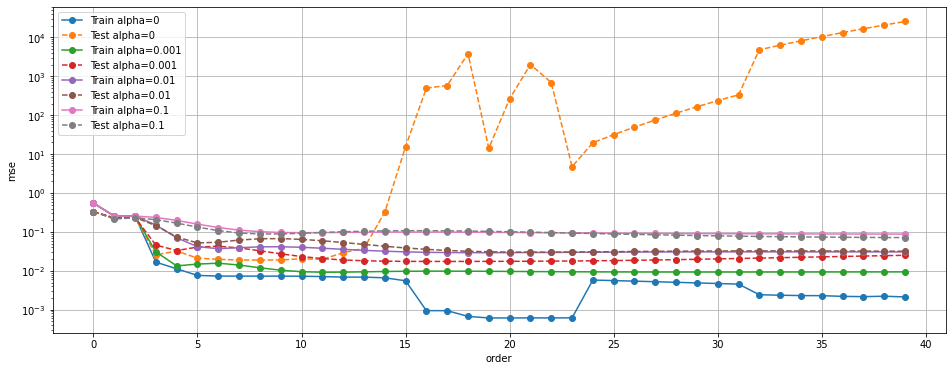

In [84]:
from sklearn.linear_model import Ridge


alphas = [0,0.001, 0.01, 0.1]
degrees = range(0,40)

plt.figure(figsize=(16,6))
for alpha in alphas:
    train_mse = list()
    test_mse = list()
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)
    
        train_mse.append(train_error)
        test_mse.append(test_error)
    
#         print(f'Alpha: {alpha} Degree: {degree} Train MSE: {train_error:0.2} Test MSE: {test_error:0.2}')
    

    plt.semilogy(degrees, train_mse, '-o', label=f'Train alpha={alpha}')
    plt.semilogy(degrees, test_mse, '--o', label=f'Test alpha={alpha}')

plt.legend()
plt.xlabel('order')
plt.ylabel('mse')
# plt.ylim([0,10])
plt.grid(True)